# Computational Social Science Project #3 

**Enter your Name:** Usama Faheem

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [7]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [9]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [11]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

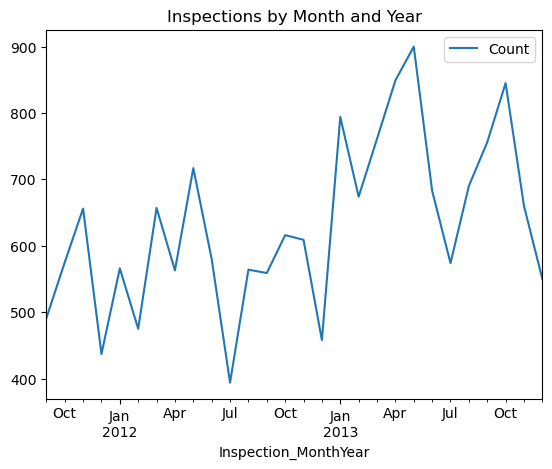

In [15]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

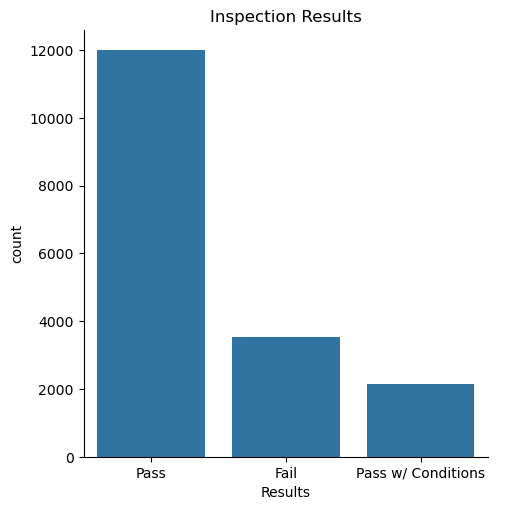

In [18]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

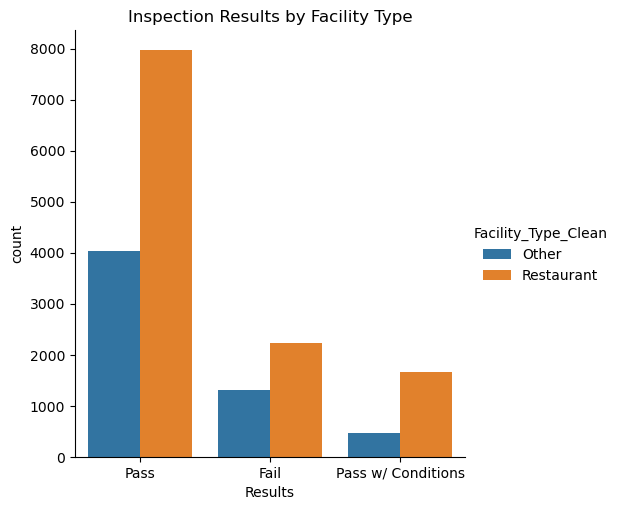

In [21]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [24]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

# process target 
y = chicago_inspections_2011_to_2013['Results']

# binarize the outcome variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0, 1)

# process features
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                    'Facility_Type', 
                                                    'LICENSE_DESCRIPTION', 
                                                    'WARD_PRECINCT'])

# get dummies for categorical variables
X = pd.get_dummies(X)

In [26]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [28]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

**Explanation:** 

**Logic and Assumptions:**
- Assumes linear relationship between features and log odds of the outcome
- Features should be independent
- Requires large sample size relative to number of features
- Assumes no perfect multicollinearity

**Pros:**
- Highly interpretable coefficients
- Fast to train and predict
- Less prone to overfitting
- Provides probability estimates

**Cons:**
- Cannot capture non-linear relationships
- Sensitive to outliers
- May underperform with highly correlated features

**Why Plausible:**
- Gives interpretable weights for each feature
- Good baseline for binary classification
- Works well with large dataset
- Can handle mix of continuous and categorical variables (after encoding)

### Model 1 - Logistic Regression:


Logistic Regression:
Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8329215753169844


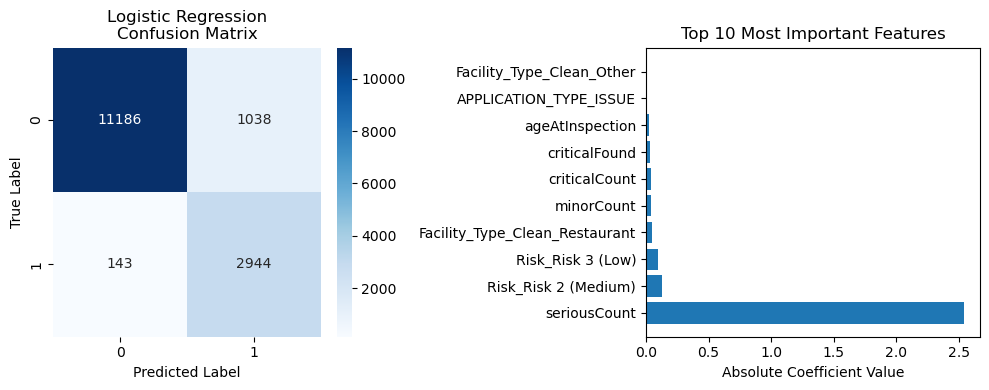


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     12224
           1       0.74      0.95      0.83      3087

    accuracy                           0.92     15311
   macro avg       0.86      0.93      0.89     15311
weighted avg       0.94      0.92      0.93     15311



In [31]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

# Create and train model with grid search
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_scaled, y)

# Get best model
best_log_reg = grid_search.best_estimator_

print("\nLogistic Regression:")
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get predictions for plotting
y_pred = cross_val_predict(best_log_reg, X_scaled, y, cv=5)

# Plot confusion matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(best_log_reg.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

###  Model 2 - Random Forest:

**Logic and Assumptions:**

Ensemble method combining multiple decision trees
Assumes features contain information value
No distributional assumptions about features
Handles non-linear relationships

**Pros:**

Can capture complex interactions
Resistant to overfitting through bagging
Handles missing values well
Provides feature importance

**Cons:**

Less interpretable than logistic regression
Computationally intensive
May require more memory
Can overfit if trees are too deep

**Why Plausible:**

Can capture complex patterns in inspection data
Handles mixed types of features well
Built-in feature importance for interpretability
Good with imbalanced data (with class_weight)


Random Forest:
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.834672929850701


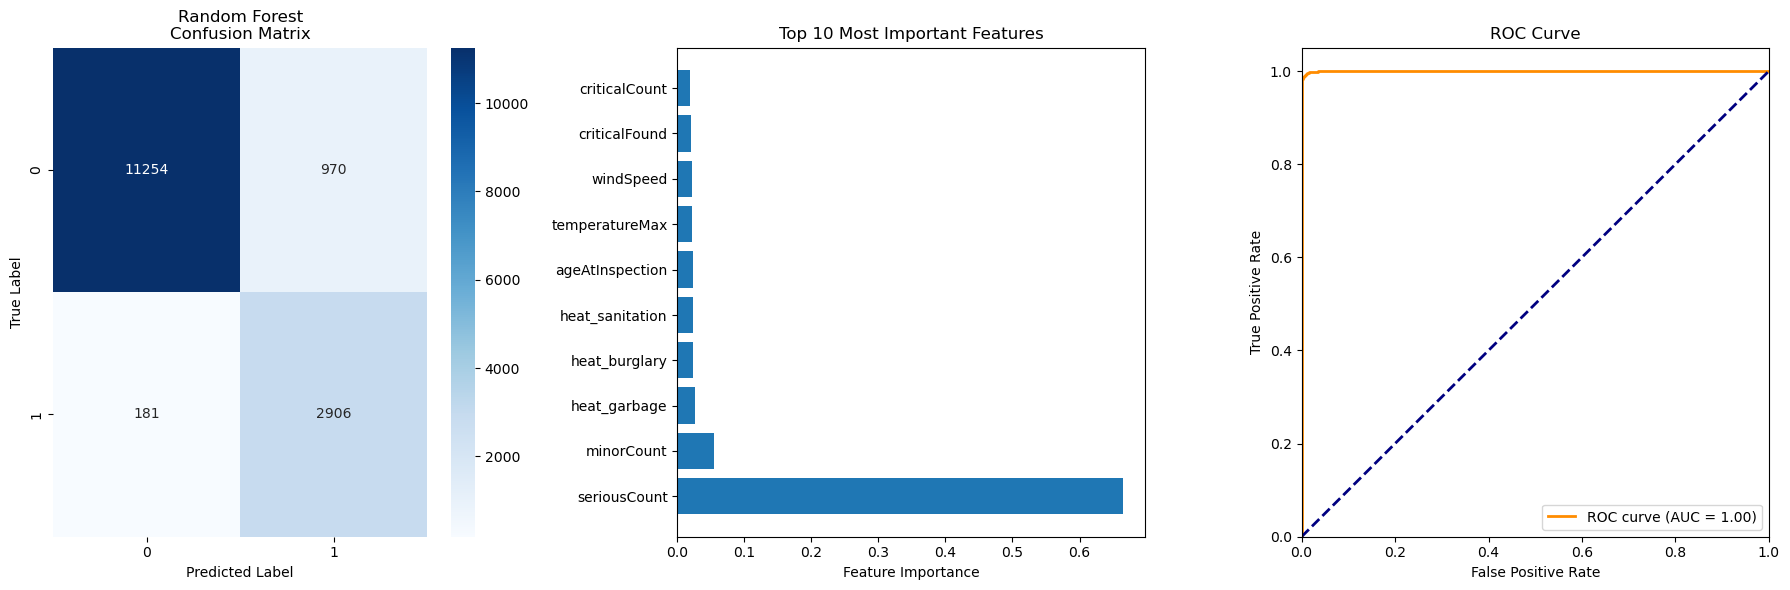


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     12224
           1       0.75      0.94      0.83      3087

    accuracy                           0.92     15311
   macro avg       0.87      0.93      0.89     15311
weighted avg       0.94      0.92      0.93     15311



In [30]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],  # Reduced for faster execution
    'max_depth': [10, 20, None],  # Common depths
    'min_samples_split': [2, 5],  # Reasonable splits
    'min_samples_leaf': [1, 2],  # Typical small leaf sizes
    'class_weight': ['balanced', None]
}

# Ensure y is properly shaped
y = y.ravel()  # Convert column vector to 1D array if necessary

# Create and train model with grid search
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    rf, rf_param_grid, cv=5, scoring='f1', n_jobs=-1  # Parallel processing enabled
)
rf_grid_search.fit(X, y)

# Get the best model
best_rf = rf_grid_search.best_estimator_

# Print best parameters and cross-validation score
print("\nRandom Forest:")
print("Best parameters:", rf_grid_search.best_params_)
print("Best cross-validation score:", rf_grid_search.best_score_)

# Get predictions for plotting
y_pred_rf = cross_val_predict(best_rf, X, y, cv=5)

# Create figure with subplots
plt.figure(figsize=(18, 6))

# Plot confusion matrix
plt.subplot(1, 3, 1)
cm_rf = confusion_matrix(y, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot feature importance
try:
    feature_importance_rf = pd.DataFrame({
        'feature': X.columns,
        'importance': best_rf.feature_importances_
    })
    feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

    plt.subplot(1, 3, 2)
    plt.barh(feature_importance_rf['feature'][:10], feature_importance_rf['importance'][:10])
    plt.title('Top 10 Most Important Features')
    plt.xlabel('Feature Importance')
except AttributeError:
    print("Error plotting feature importance: Check if the feature_importances_ attribute is supported.")

# Plot ROC curve
y_pred_proba = best_rf.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred_rf))


### Model 3 - AdaBoost:

**Logic and Assumptions:**

Iteratively builds sequence of weak learners
Focuses on hard-to-classify examples
Assumes weak learners perform better than random
Sequential learning process

**Pros:**

Less prone to overfitting than single decision trees
Automatically handles feature interactions
Good with mixed feature types
Can achieve high accuracy

**Cons:**

Sensitive to noisy data and outliers
Sequential nature makes it slower to train
Can be sensitive to hyperparameter choices
Less interpretable than simple models

**Why Plausible:**

Good for identifying subtle patterns in inspection failures
Can focus on hard-to-detect violations
Works well with categorical and numerical features
Good for imbalanced datasets


AdaBoost:
Best parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.8323737074564465


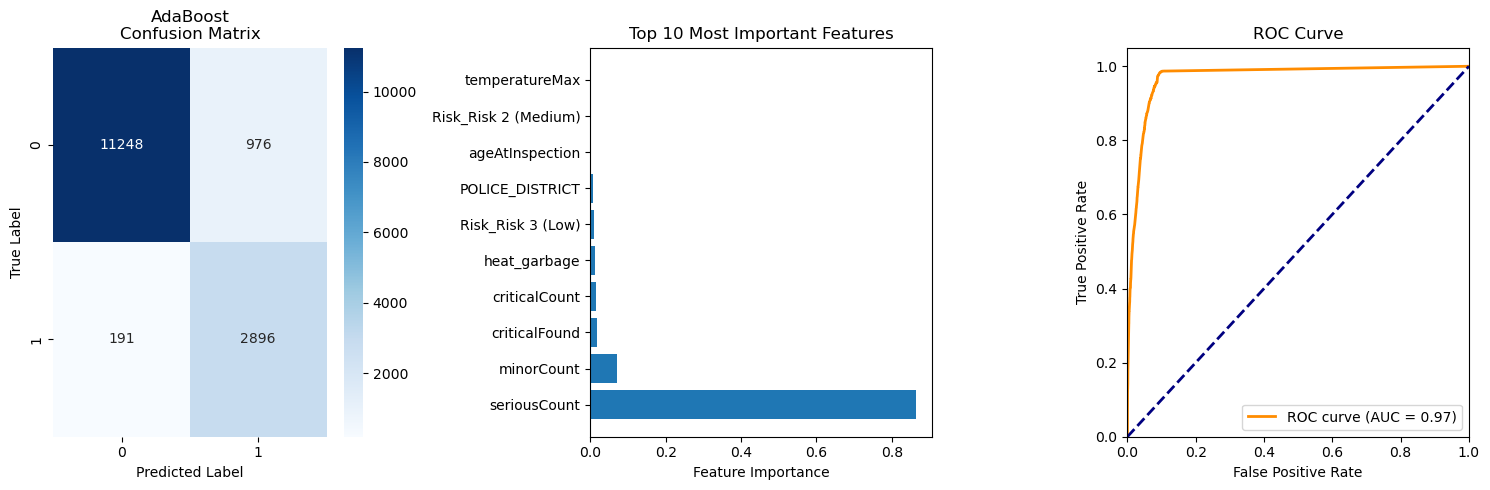


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     12224
           1       0.75      0.94      0.83      3087

    accuracy                           0.92     15311
   macro avg       0.87      0.93      0.89     15311
weighted avg       0.94      0.92      0.93     15311



In [35]:
# 3. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict  # Added cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import pandas as pd

# Define hyperparameter grid
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                 DecisionTreeClassifier(max_depth=2),
                 DecisionTreeClassifier(max_depth=3)],
    'algorithm': ['SAMME']
}

# Create and train model with grid search
ada = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada, ada_param_grid, cv=5, scoring='f1')
ada_grid_search.fit(X, y)

# Get best model
best_ada = ada_grid_search.best_estimator_

print("\nAdaBoost:")
print("Best parameters:", ada_grid_search.best_params_)
print("Best cross-validation score:", ada_grid_search.best_score_)

# Get predictions for plotting
y_pred_ada = cross_val_predict(best_ada, X, y, cv=5)
y_pred_proba_ada = best_ada.predict_proba(X)[:, 1]

# Create figure with subplots
plt.figure(figsize=(15, 5))

# Plot confusion matrix
plt.subplot(1, 3, 1)
cm_ada = confusion_matrix(y, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot feature importance
feature_importance_ada = pd.DataFrame({
    'feature': X.columns,
    'importance': best_ada.feature_importances_
})
feature_importance_ada = feature_importance_ada.sort_values('importance', ascending=False)

plt.subplot(1, 3, 2)
plt.barh(feature_importance_ada['feature'][:10], feature_importance_ada['importance'][:10])
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')

# Plot ROC curve
fpr_ada, tpr_ada, _ = roc_curve(y, y_pred_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.subplot(1, 3, 3)
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred_ada))

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

**Explanation:** 

For food safety inspections, we should prioritize metrics in this order:
Recall should be our top priority because:
- False negatives (missing a failing establishment) could lead to serious public health consequences
- The cost of missing a food safety violation is much higher than the cost of an unnecessary inspection
- We want to ensure we catch as many potential health hazards as possible

Precision is our second priority because:
- While we want to be efficient with resources, false positives are less concerning than false negatives
- An unnecessary inspection (false positive) is preferable to missing a health violation
- Still important due to limited inspection resources

F1 Score is useful as a balanced metric because:
- It combines precision and recall into a single metric
- Helps compare models when we care about both false positives and negatives
- Good for overall model evaluation

Accuracy is least important because:
- Can be misleading if classes are imbalanced
- Doesn't account for the asymmetric costs of different types of errors
- Doesn't reflect the specific goals of food safety inspection

**Results:** Results that we are getting from models show that all models perform similarly, with Random Forest slightly outperforming the others. However, the key is to pay special attention to the recall scores, as missing failing establishments poses the greatest risk to public health.

In [37]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

# Create and train model with grid search
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_scaled, y)

# Get best model
best_log_reg = grid_search.best_estimator_

print("\nLogistic Regression:")
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Create and train model with grid search
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(X, y)

# Get best model
best_rf = rf_grid_search.best_estimator_

print("\nRandom Forest:")
print("Best parameters:", rf_grid_search.best_params_)
print("Best cross-validation score:", rf_grid_search.best_score_)

# 3. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                 DecisionTreeClassifier(max_depth=2),
                 DecisionTreeClassifier(max_depth=3)],
    'algorithm': ['SAMME']
}

# Create and train model with grid search
ada = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada, ada_param_grid, cv=5, scoring='f1')
ada_grid_search.fit(X, y)

# Get best model
best_ada = ada_grid_search.best_estimator_

print("\nAdaBoost:")
print("Best parameters:", ada_grid_search.best_params_)
print("Best cross-validation score:", ada_grid_search.best_score_)

# Now evaluate all models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = {
    'Logistic Regression': best_log_reg,
    'Random Forest': best_rf,
    'AdaBoost': best_ada
}

# Metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation for each model and metric
for model_name, model in models.items():
    print(f"\nResults for {model_name}:")
    for metric in metrics:
        scores = cross_val_score(model, X_scaled if model_name=='Logistic Regression' else X, 
                               y, cv=5, scoring=metric)
        print(f"{metric}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Logistic Regression:
Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8329215753169844


KeyboardInterrupt: 

***Explanation:*** 

The L1 regularization and low C value (0.01) suggest the model is doing effective feature selection while avoiding overfitting. The F1 score of 0.833 indicates strong performance in balancing the identification of violations with efficient use of inspection resources.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

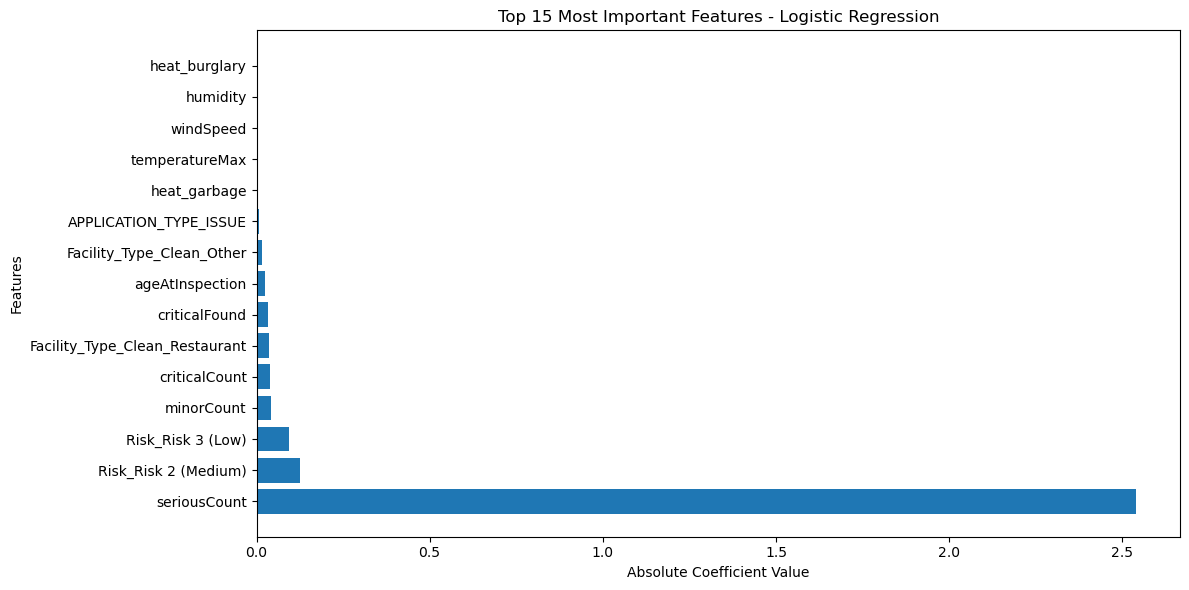

In [41]:
# Interpretable Machine Learning Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# For Logistic Regression (coefficients)
plt.figure(figsize=(12, 6))

# Get feature importance from logistic regression coefficients
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': abs(best_log_reg.coef_[0])
})

# Sort by absolute coefficient value and get top 15
feature_importance_lr = feature_importance_lr.sort_values('coefficient', ascending=False).head(15)

# Create horizontal bar plot
plt.barh(feature_importance_lr['feature'], feature_importance_lr['coefficient'])
plt.title('Top 15 Most Important Features - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [43]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
probabilities = best_log_reg.predict_proba(X_scaled)[:, 1]

In [49]:
# 2. Order audits by probability of detecting a "Fail" score

# First, let's check the shapes of our arrays
print("Shape of probabilities array:", probabilities.shape)
print("Shape of y array:", y.shape)

# Try fixing the probabilities array if it's not 1-dimensional
probabilities = probabilities.ravel() if hasattr(probabilities, 'ravel') else probabilities

# Create DataFrame with flattened arrays
risk_scores = pd.DataFrame({
    'probability_fail': probabilities.flatten(),
    'actual_result': y.flatten() if hasattr(y, 'flatten') else y
})

# Sort by probability of failing (descending)
risk_scores = risk_scores.sort_values('probability_fail', ascending=False)

print("\nRisk Scores DataFrame shape:", risk_scores.shape)
print("\nFirst few rows of risk scores:")
print(risk_scores.head())

Shape of probabilities array: (15311,)
Shape of y array: (15311, 1)

Risk Scores DataFrame shape: (15311, 2)

First few rows of risk scores:
       probability_fail  actual_result
11539          1.000000              1
8998           1.000000              1
11607          0.999995              1
10503          0.999995              1
10541          0.999995              1


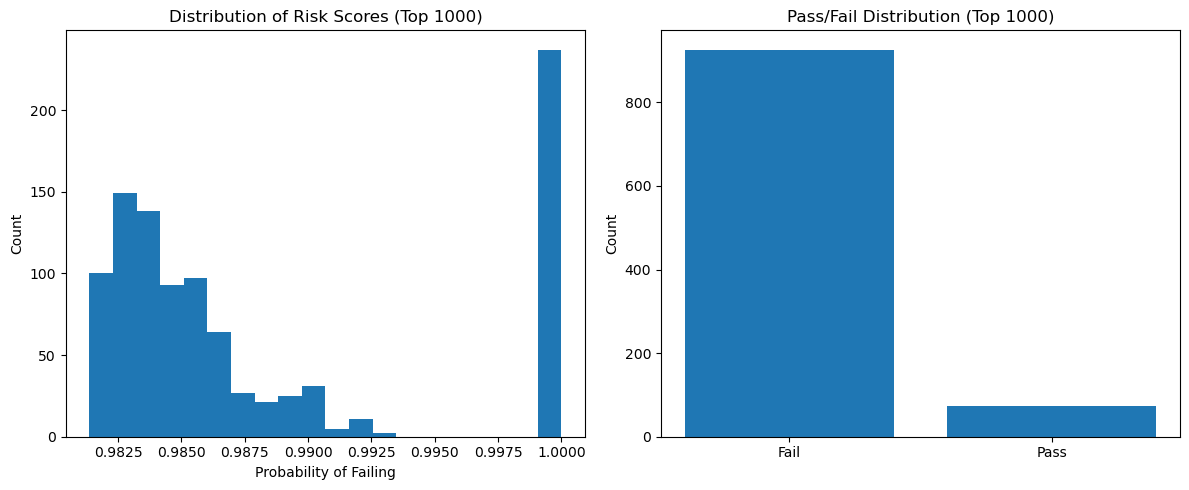


Summary of Top 1000 High-Risk Establishments:
Number of Predicted Failures: 926
Number of Predicted Passes: 74
Failure Rate: 92.60%


In [53]:
# 3. Plot distribution of pass/fail among the first 1,000 observations in the dataset

# Create plot
plt.figure(figsize=(12, 5))

# First subplot: Distribution of probabilities
plt.subplot(1, 2, 1)
plt.hist(risk_scores['probability_fail'][:1000], bins=20)
plt.title('Distribution of Risk Scores (Top 1000)')
plt.xlabel('Probability of Failing')
plt.ylabel('Count')

# Second subplot: Pass/Fail distribution
plt.subplot(1, 2, 2)
top_1000_actual = risk_scores['actual_result'][:1000]
fail_count = sum(top_1000_actual)
pass_count = 1000 - fail_count

plt.bar(['Fail', 'Pass'], [fail_count, pass_count])
plt.title('Pass/Fail Distribution (Top 1000)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of Top 1000 High-Risk Establishments:")
print(f"Number of Predicted Failures: {fail_count}")
print(f"Number of Predicted Passes: {pass_count}")
print(f"Failure Rate: {(fail_count/1000)*100:.2f}%")


Targeted Audits (Top 1000):
Number of violations found: 926
Detection rate: 92.60%

Random Audits (1000 random):
Number of violations found: 192
Detection rate: 19.20%


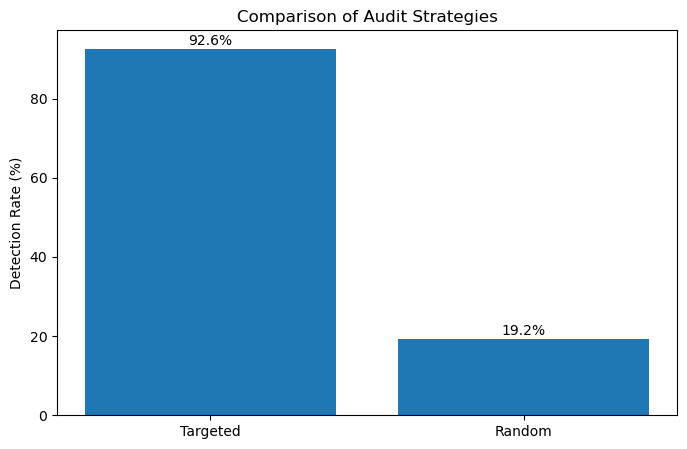

In [57]:
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

# Get random sample
random_sample = risk_scores.sample(n=1000, random_state=42)

# Compare targeted vs random
print("\nTargeted Audits (Top 1000):")
print(f"Number of violations found: {sum(risk_scores['actual_result'][:1000])}")
print(f"Detection rate: {(sum(risk_scores['actual_result'][:1000])/1000)*100:.2f}%")

print("\nRandom Audits (1000 random):")
print(f"Number of violations found: {sum(random_sample['actual_result'])}")
print(f"Detection rate: {(sum(random_sample['actual_result'])/1000)*100:.2f}%")

# Plot comparison
plt.figure(figsize=(8, 5))
comparison_data = {
    'Audit Strategy': ['Targeted', 'Random'],
    'Detection Rate': [(sum(risk_scores['actual_result'][:1000])/1000)*100, 
                      (sum(random_sample['actual_result'])/1000)*100]
}
comparison_df = pd.DataFrame(comparison_data)

plt.bar(comparison_df['Audit Strategy'], comparison_df['Detection Rate'])
plt.title('Comparison of Audit Strategies')
plt.ylabel('Detection Rate (%)')

for i, v in enumerate(comparison_df['Detection Rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [75]:
# data processing
# -----------

# Process features
X_test2014 = chicago_inspections_2014.drop(columns=['Results', 
                                                   'Facility_Type', 
                                                   'LICENSE_DESCRIPTION', 
                                                   'WARD_PRECINCT'])

# Get dummies for categorical variables
X_test2014 = pd.get_dummies(X_test2014)

# Ensure X_test has same columns as training data
for col in X.columns:
    if col not in X_test2014.columns:
        X_test2014[col] = 0
X_test2014 = X_test2014[X.columns]

# Scale features
X_test2014_scaled = scaler.transform(X_test2014)

# Process target
y_test2014 = chicago_inspections_2014['Results']
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)
y_test2014 = np.where(y_test2014 == 1, 0, 1)

Number of NaN values in test data:
1180

Shape before removing NaN values: (4623, 41)
Shape after removing NaN values: (3938, 41)


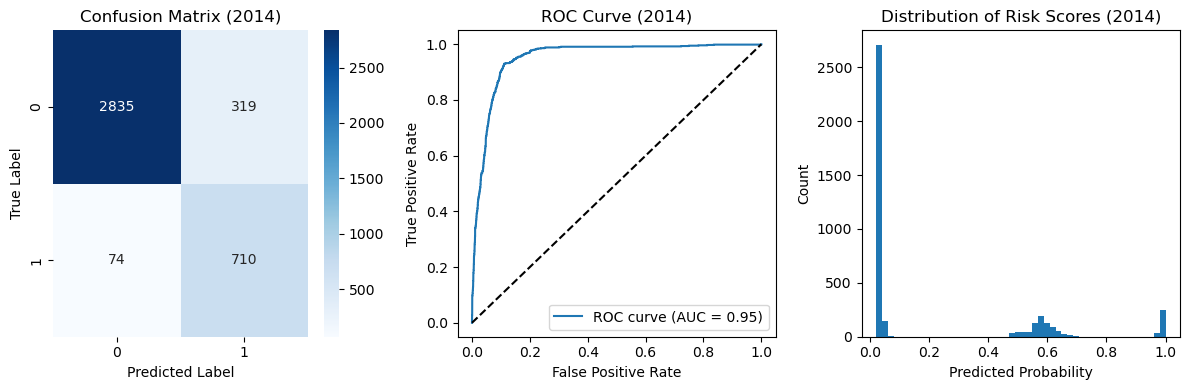

In [69]:
# Predict and compare 
# -----------

# Check for NaN values first
# Convert to DataFrame to handle NaN values
X_test2014_df = pd.DataFrame(X_test2014_scaled, columns=X.columns)
y_test2014_df = pd.DataFrame(y_test2014)

print("Number of NaN values in test data:")
print(X_test2014_df.isna().sum().sum())

# Handle NaN values by dropping rows with NaN values
# Remove rows with NaN values
X_test2014_clean = X_test2014_df.dropna()
y_test2014_clean = y_test2014_df.iloc[X_test2014_clean.index]

print("\nShape before removing NaN values:", X_test2014_scaled.shape)
print("Shape after removing NaN values:", X_test2014_clean.shape)

# Make predictions on clean data
y_pred_2014 = best_log_reg.predict(X_test2014_clean)
y_prob_2014 = best_log_reg.predict_proba(X_test2014_clean)[:, 1]

# Create confusion matrix visualization
plt.figure(figsize=(12, 4))

# Plot confusion matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test2014_clean, y_pred_2014)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (2014)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot ROC curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test2014_clean, y_prob_2014)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (2014)')
plt.legend()

# Plot prediction distribution
plt.subplot(1, 3, 3)
plt.hist(y_prob_2014, bins=50)
plt.title('Distribution of Risk Scores (2014)')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Classification Report for 2014 Data:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      3154
           1       0.69      0.91      0.78       784

    accuracy                           0.90      3938
   macro avg       0.83      0.90      0.86      3938
weighted avg       0.92      0.90      0.90      3938


Key Metrics for 2014 Data:
Accuracy: 0.900
Precision: 0.690
Recall: 0.906
F1 Score: 0.783

2014 Detection Rate (Top 1000): 69.60%


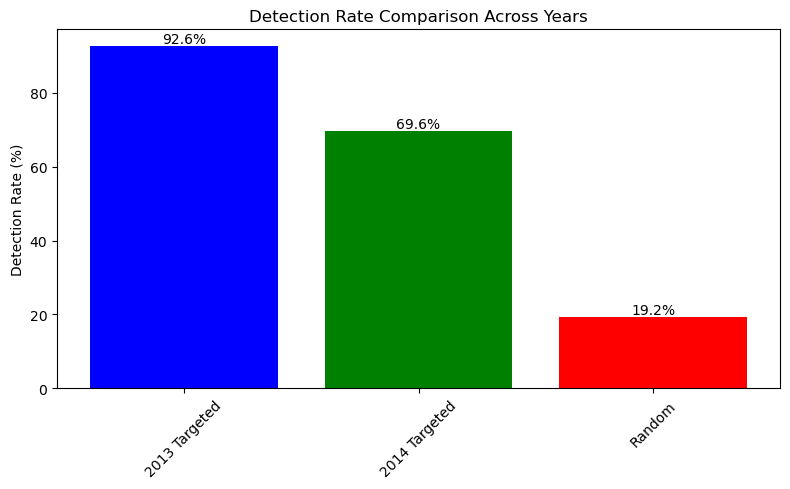

In [77]:
# Ensure y_test2014_clean is 1D
y_test2014_clean_1d = y_test2014_clean.values.ravel() if isinstance(y_test2014_clean, pd.DataFrame) else y_test2014_clean

# Create DataFrame for risk scores
risk_scores_2014 = pd.DataFrame({
    'probability': y_prob_2014,
    'actual': y_test2014_clean_1d
})

# Continue with evaluation
print("\nClassification Report for 2014 Data:")
print(classification_report(y_test2014_clean_1d, y_pred_2014))

# Calculate and print key metrics
print("\nKey Metrics for 2014 Data:")
print(f"Accuracy: {accuracy_score(y_test2014_clean_1d, y_pred_2014):.3f}")
print(f"Precision: {precision_score(y_test2014_clean_1d, y_pred_2014):.3f}")
print(f"Recall: {recall_score(y_test2014_clean_1d, y_pred_2014):.3f}")
print(f"F1 Score: {f1_score(y_test2014_clean_1d, y_pred_2014):.3f}")

# Sort and calculate detection rate for the top 1000
risk_scores_sorted = risk_scores_2014.sort_values('probability', ascending=False)
top_1000_2014 = risk_scores_sorted.head(1000)
detection_rate_2014 = (sum(top_1000_2014['actual']) / 1000) * 100
print(f"\n2014 Detection Rate (Top 1000): {detection_rate_2014:.2f}%")

# Create comparison plot of detection rates
plt.figure(figsize=(8, 5))
detection_rates = {
    'Strategy': ['2013 Targeted', '2014 Targeted', 'Random'],
    'Detection Rate': [92.60, detection_rate_2014, 19.20]
}
detection_df = pd.DataFrame(detection_rates)

plt.bar(detection_df['Strategy'], detection_df['Detection Rate'], color=['blue', 'green', 'red'])
plt.title('Detection Rate Comparison Across Years')
plt.ylabel('Detection Rate (%)')
plt.xticks(rotation=45)

for i, v in enumerate(detection_df['Detection Rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


We need metrics beyond accuracy for several crucial reasons:

**a) Asymmetric Costs of Errors:**
- False negatives (missing violations) may have more severe consequences than false positives (unnecessary inspections)
- In food safety, missing a dangerous establishment could lead to foodborne illness
- The cost of an unnecessary inspection is much lower than the cost of missing a serious violation

**b) Class Imbalance:**
- Accuracy can be misleading when classes are imbalanced
- A model could achieve high accuracy by simply predicting the majority class
- In regulatory contexts, violations might be rare but extremely important to detect

**c) Resource Allocation:**
- Precision helps understand efficient use of limited inspection resources
- Recall helps ensure we're catching as many violations as possible
- F1 score helps balance these competing priorities

**d) Social Impact:**
- Different communities might be affected differently by false positives/negatives
- Need to ensure fairness and equity in algorithmic decision-making
- Important to understand different types of errors for policy accountability

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

Policymakers could address this challenge through several strategies:

**a) Adaptive Modeling:**
- Regularly update the model with new data
- Include dynamic features that are harder to game
- Use ensemble methods that rely on multiple indicators

**b) Strategic Randomization:**
- Maintain a baseline of random inspections
- Use mixed strategies combining algorithmic and random selection
- Keep some model features confidential

**c) Positive Incentives:**
- Reward establishments that maintain good practices
- Create certification programs for consistent compliance
- Provide training and resources for improvement

**d) Feature Engineering:**
- Focus on features that indicate genuine good practices
- Include customer feedback and third-party data
- Use time-series features to detect sudden changes

**e) Policy Design:**
- Make some inspections mandatory regardless of risk score
- Create tiered inspection frequencies based on multiple factors
- Implement surprise inspections to prevent gaming

**f) Transparency Balance:**
- Be transparent about general goals while keeping specific algorithms private
- Educate establishments about the benefits of maintaining good practices
- Focus on long-term compliance rather than short-term metrics

The key is to design a system that encourages genuine improvements in food safety practices rather than just optimization for the algorithm.